# Problem 1 (audio storage) 
Suppose there is a 1-hour audio file with 8kHz sampling rate and 16-bit representation for each sample, how much disk space does it need to store it without compression?

In [1]:
# disk_space= seconds*frequency*bytes
disk_space = 3600*8000*(16/8) 
print("we need {} MB disk space".format(disk_space/(10**6)))

we need 57.6 MB disk space


# Problem 2 (framing) 
To process this 1-hour audio, typically we divide it into frames (small chunks). If the frame width is 30ms and the frame shift is 10 ms, how many frames will be generated from this 1-hour audio file? How many audio samples are there in each frame?

In [2]:
# nframes = seconds*frames/second
nframes = int(3600*(1/0.01))
# nsamples = seconds*samples/second
nsamples = int(0.03*8000)
print("it generates {} frames and {} samples/frame".format(nframes,nsamples))

it generates 360000 frames and 240 samples/frame


# Problem 3 (feature storage) 
If each frame of the speech signal is represented by a 13-dim cepstral feature vector in 32-bit floating point, how much disk space does it need to store these features without compression?

In [3]:
# fdisk_space = nframes*dim*bytes
fdisk_space = nframes*13*(32/8)
print("each frame needs {} MB disk space".format(fdisk_space/(10**6)))

each frame needs 18.72 MB disk space


# Problem 4 (spectrogram) 
Record the utterance "deep learning for computer vision speech and language" using your voice. Plot out the spectrogram 

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
soundFile1 = '/Users/cengjianhuan/Downloads/Rec 0001.wav'
fw = wave.open(soundFile1 ,'r')
nchans = fw.getnchannels()
nframes = fw.getnframes()
sFreq = fw.getframerate()

# get data points from sound 
soundInfo = fw.readframes(nframes) 
soundInfo = np.frombuffer(soundInfo, np.int16) 

# pick only one channel, since two are almost the same  
soundInfo = np.reshape(soundInfo, [nframes, nchans])
soundInfo = soundInfo[:,1] 

# pre-emphasis 
soundInfo = soundInfo[20000:] # cut useless pre-sound information 
soundInfo = soundInfo - np.append(soundInfo[0], soundInfo[1:]-0.95*soundInfo[:-1])  

fw.close()

print(len(soundInfo))

223096


Text(0.5,1,'waveform')

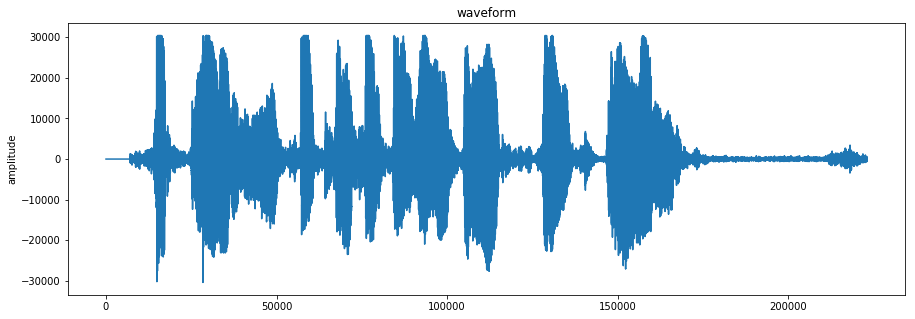

In [3]:
plt.figure(figsize=(15,5))
plt.plot(soundInfo)
plt.ylabel('amplitude')
plt.title('waveform')
#plt.xticks([])
#plt.show()

/Users/cengjianhuan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0.5,1,'the narrowband spectrogram')

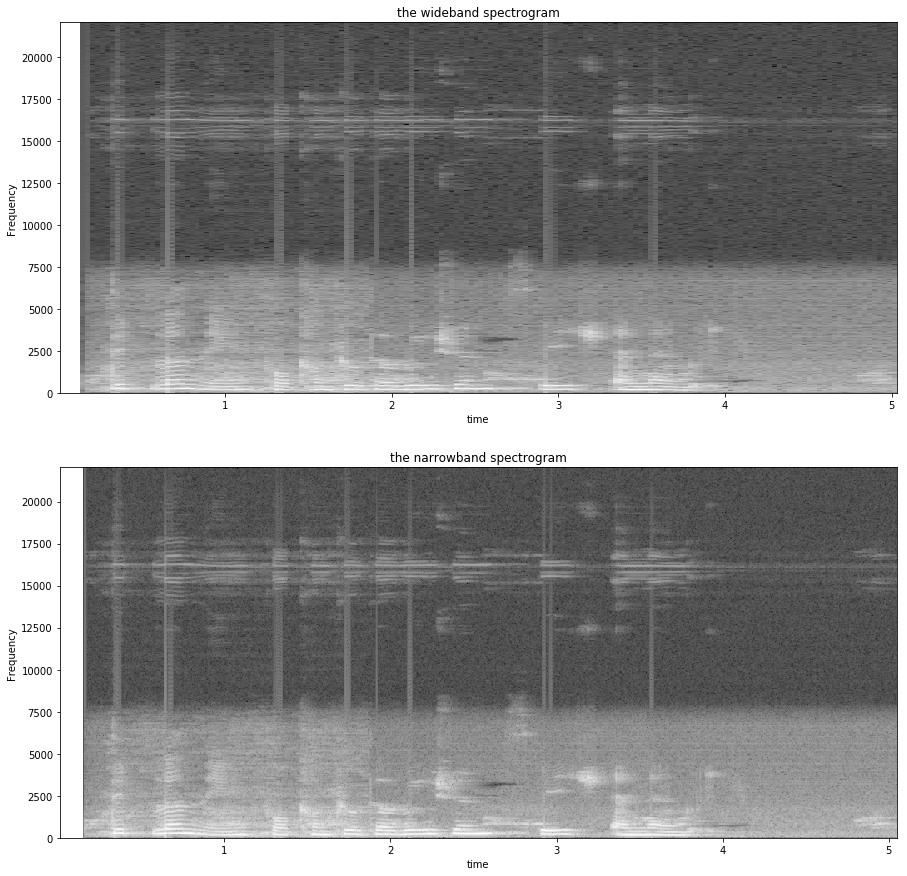

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(211)
plt.specgram(soundInfo, Fs=sFreq, NFFT=2200
             , cmap='gray', noverlap=int(sFreq*0.02))
plt.ylabel('Frequency')
plt.xlabel('time')
plt.title('the wideband spectrogram')

plt.subplot(212)
plt.specgram(soundInfo, Fs=sFreq, NFFT=1000, cmap='gray', noverlap=int(sFreq*0.02))
plt.ylabel('Frequency')
plt.xlabel('time')
plt.title('the narrowband spectrogram')
#plt.show()

# Problem 5 (pitch/formant) 
Record the sound "/a:/" for about 1 second using your voice and plot its waveform and spectrum, (roughly) estimate your pitch and the first 3 formants for this sound (something like lecture slide 27).

In [7]:
soundFile2 = '/Users/cengjianhuan/Downloads/Rec 0002.wav'
fw = wave.open(soundFile2 ,'r')

nchans = fw.getnchannels()
nframes = fw.getnframes()
sFreq = fw.getframerate()

# get data points from sound 
soundInfo = fw.readframes(nframes) 
soundInfo = np.frombuffer(soundInfo, np.int16) 

# pick only one channel, since two are almost the same  
soundInfo = np.reshape(soundInfo, [nframes, nchans])
soundInfo = soundInfo[:,1] 

# pre-emphasis 
soundInfo = soundInfo[22000:] # cut to 1s: sFreq+22000
soundInfo = soundInfo - np.append(soundInfo[0], soundInfo[1:]-0.95*soundInfo[:-1])
# soundInfo = 2*soundInfo/(max(soundInfo)-min(soundInfo))
fw.close()
  

Text(0.5,1,'waveform')

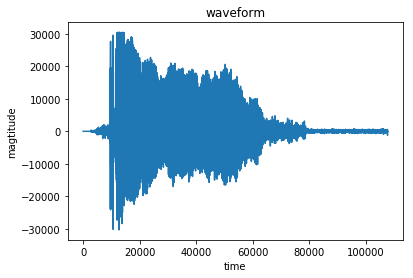

In [8]:
plt.plot(soundInfo)
plt.ylabel('magtitude')
plt.xlabel('time')
plt.title('waveform')
#plt.show()

/Users/cengjianhuan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0.5,1,'spectrogram')

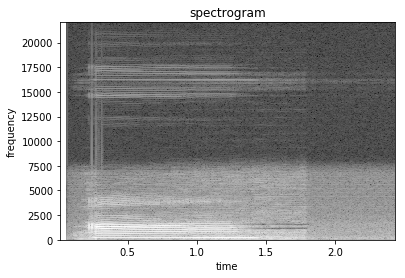

In [9]:
plt.specgram(soundInfo, Fs=sFreq, NFFT=1024,noverlap=int(sFreq*0.02), cmap='gray')
plt.ylabel('frequency')
plt.xlabel('time')
plt.title('spectrogram')
#plt.show()

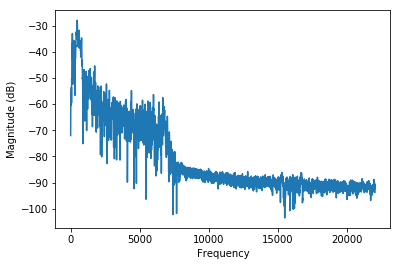

In [10]:
# to find pitch and the first 3 formants 
spectrum, freqs, l = plt.magnitude_spectrum(soundInfo, Fs=sFreq, scale='dB', pad_to=5000)

In [11]:
from matplotlib.ticker import MultipleLocator

The pitch/first Formant is about 476 Hz
The second Formant is about 1737 Hz
The third Formant is about 2593 Hz


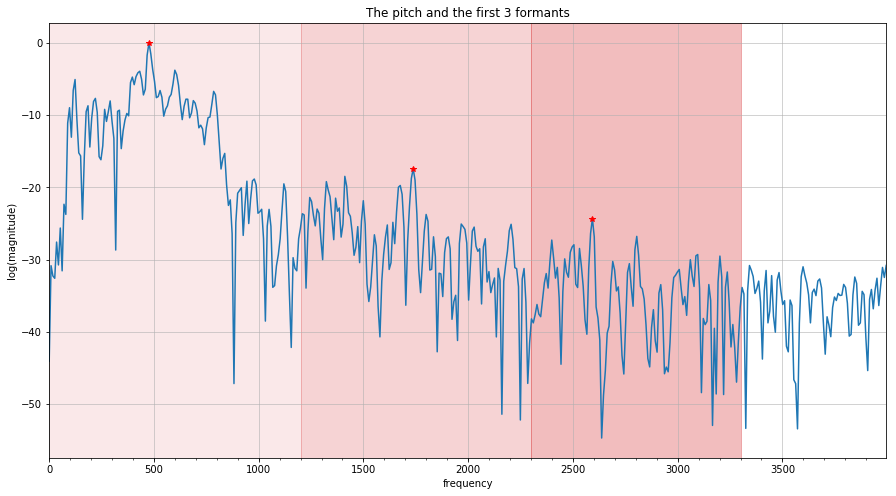

In [13]:
# a filter 
cond = np.where(freqs<4000)
spectrum1 = spectrum[cond]
freqs1 = freqs[cond]

spectrum1 = (spectrum1/(max(spectrum1)-min(spectrum1)))
db = 20*np.log10(spectrum1)

# set plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.set_xlim([freqs1[0], freqs1[-1]])

plt.grid(alpha=0.7)
plt.ylabel('log(magnitude)')
plt.xlabel('frequency')
plt.title('The pitch and the first 3 formants')
plt.plot(freqs1, db)


# envelopes
ax.xaxis.set_minor_locator(MultipleLocator(100))

f1_y = np.max(db[0:120])
f1_x = freqs1[np.where(db == f1_y)]
plt.plot(f1_x, f1_y, 'r*')
plt.axvspan(0, 1200, color='#d62728', alpha=0.1)
print('The pitch/first Formant is about', int(f1_x), 'Hz' )

f2_y = np.max(db[120:290])
f2_x = freqs1[np.where(db == f2_y)]
plt.plot(f2_x, f2_y, 'r*')
plt.axvspan(1200, 2300, color='#d62728', alpha=0.2)
print('The second Formant is about', int(f2_x), 'Hz' )

f3_y = np.max(db[290:327])
f3_x = freqs1[np.where(db == f3_y)]
plt.plot(f3_x, f3_y, 'r*')
plt.axvspan(2300, 3300, color='#d62728', alpha=0.3)
print('The third Formant is about', int(f3_x), 'Hz' )